In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("adult_with_headers (1).csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
df.isin(['?', 'NaN']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
#numerical columns
num_cols = df.select_dtypes(['int64'])
#categorical columns
cat_cols = df.select_dtypes(['object'])

In [7]:
# Apply Scaling Techniques (Standard & MinMax)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
mm = MinMaxScaler()

standard_scaled = pd.DataFrame(ss.fit_transform(num_cols), columns=num_cols.columns)
minmax_scaled = pd.DataFrame(mm.fit_transform(num_cols), columns=num_cols.columns)

print('========= StandardScaler ========= \n',standard_scaled )

print('========= MinMaxScaler ========= \n',minmax_scaled)

========= StandardScaler ========= 
             age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.030671 -1.063611       1.134739      0.148453      -0.21666   
1      0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2     -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3      1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4     -0.775768  1.408176       1.134739     -0.145920      -0.21666   
...         ...       ...            ...           ...           ...   
32556 -0.849080  0.639741       0.746039     -0.145920      -0.21666   
32557  0.103983 -0.335433      -0.420060     -0.145920      -0.21666   
32558  1.423610 -0.358777      -0.420060     -0.145920      -0.21666   
32559 -1.215643  0.110960      -0.420060     -0.145920      -0.21666   
32560  0.983734  0.929893      -0.420060      1.888424      -0.21666   

       hours_per_week  
0           -0.035429  
1           -2.222153  
2           -0.035429  
3 

In [8]:
# StandardScaler
# It standardizes the data so that the mean becomes 0 and standard deviation becomes 1.
# Best when the data is normally distributed or when algorithms use distance or gradient (like SVM, KNN, Logistic Regression).
# It makes all features equally important.

# MinMaxScaler
# It scales values into a fixed range, usually 0 to 1.
# Useful when we want to preserve the original shape of the data but just shrink the values.
# Works well in models like Neural Networks or K-Means.

# In simple words:
# StandardScaler = Good when data should be centered and spread equally.
# MinMaxScaler = Good when we just need to bring values to the same scale (0 to 1).

In [10]:
#no.of categories for each column 
cat_cols.nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64

In [11]:
#Encoding Techniques

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()

# <5 categories cols apply One-Hot Encoding
OH_cols = cat_cols[['sex','income']]
# >5 categories cols apply LabelEncoding 
LE_cols= cat_cols.drop(columns=OH_cols.columns)

# LabelEncoding 
for col in LE_cols:
    LE_cols[col] = le.fit_transform(LE_cols[col])
    
LabelEn = pd.DataFrame(LE_cols, columns=LE_cols.columns)

# One-Hot Encoding
OneHotEn = pd.get_dummies(OH_cols,columns=OH_cols.columns)


print('========= Label Encoding  ========= \n', LabelEn)

print('========= One-Hot Encoding ========= \n',OneHotEn.astype(int))

========= Label Encoding  ========= 
        workclass  education  marital_status  occupation  relationship  race  \
0              7          9               4           1             1     4   
1              6          9               2           4             0     4   
2              4         11               0           6             1     4   
3              4          1               2           6             0     2   
4              4          9               2          10             5     2   
...          ...        ...             ...         ...           ...   ...   
32556          4          7               2          13             5     4   
32557          4         11               2           7             0     4   
32558          4         11               6           1             4     4   
32559          4         11               4           1             3     4   
32560          5         11               2           4             5     4   

       native

In [12]:
#One-Hot Encoding for few & non-ordered categories
#Label Encoding for many or ordered categories to reduce complexity


In [13]:
# Concatenating all processed parts together

final = pd.concat([LabelEn, OneHotEn.astype(int),num_cols], axis=1)
final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   workclass       32561 non-null  int64
 1   education       32561 non-null  int64
 2   marital_status  32561 non-null  int64
 3   occupation      32561 non-null  int64
 4   relationship    32561 non-null  int64
 5   race            32561 non-null  int64
 6   native_country  32561 non-null  int64
 7   sex_ Female     32561 non-null  int64
 8   sex_ Male       32561 non-null  int64
 9   income_ <=50K   32561 non-null  int64
 10  income_ >50K    32561 non-null  int64
 11  age             32561 non-null  int64
 12  fnlwgt          32561 non-null  int64
 13  education_num   32561 non-null  int64
 14  capital_gain    32561 non-null  int64
 15  capital_loss    32561 non-null  int64
 16  hours_per_week  32561 non-null  int64
dtypes: int64(17)
memory usage: 4.2 MB


In [14]:
# Feature Engineering is the process of creating new input features from existing ones 
# to improve model accuracy.

final['capital_diff'] = final['capital_gain'] - final['capital_loss'] # Positive values mean more capital gain, negative means more capital loss
final['is_full_time'] = np.where(final['hours_per_week'] > 40, 1, 0)  # If hours_per_week > 40 → 1 (Full-time), else 0 (Part-time)


In [15]:
#In this dataset, we derived features like capital_diff, is_full_time, and
#age_group, and simplified rare categories. These new features provide more
#meaning and patterns for machine learning models to learn from.

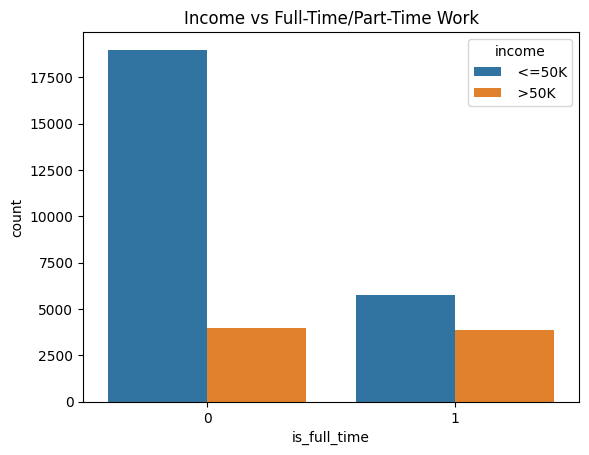

In [16]:
#Income vs Full-Time/Part-Time Work
import seaborn as sns
sns.countplot(x=final['is_full_time'], hue='income', data=df)
plt.title("Income vs Full-Time/Part-Time Work")
plt.show()

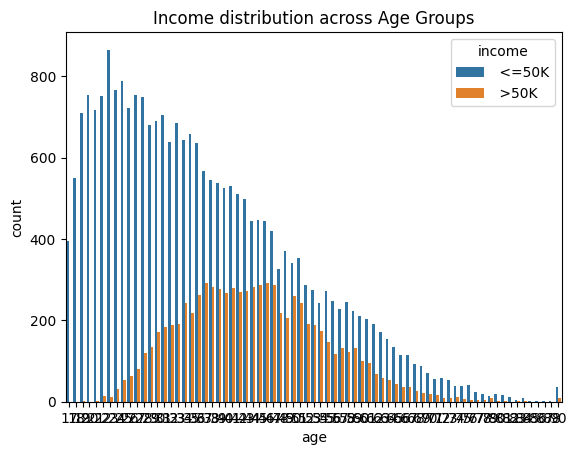

In [17]:
#Income distribution across Age Groups
sns.countplot(x='age', hue='income', data=df)
plt.title("Income distribution across Age Groups")
plt.show()

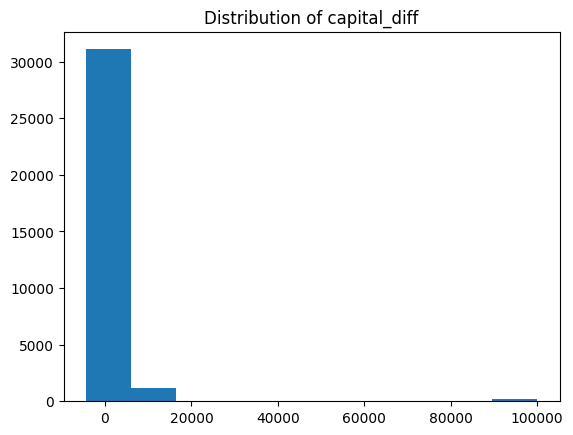

In [18]:
#"Distribution of capital_diff
plt.hist(final['capital_diff'])
plt.title("Distribution of capital_diff")
plt.show()

array([[<Axes: title={'center': 'workclass'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'marital_status'}>,
        <Axes: title={'center': 'occupation'}>],
       [<Axes: title={'center': 'relationship'}>,
        <Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'native_country'}>,
        <Axes: title={'center': 'sex_ Female'}>],
       [<Axes: title={'center': 'sex_ Male'}>,
        <Axes: title={'center': 'income_ <=50K'}>,
        <Axes: title={'center': 'income_ >50K'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'fnlwgt'}>,
        <Axes: title={'center': 'education_num'}>,
        <Axes: title={'center': 'capital_gain'}>,
        <Axes: title={'center': 'capital_loss'}>],
       [<Axes: title={'center': 'hours_per_week'}>,
        <Axes: title={'center': 'capital_diff'}>,
        <Axes: title={'center': 'is_full_time'}>, <Axes: >]], dtype=object)

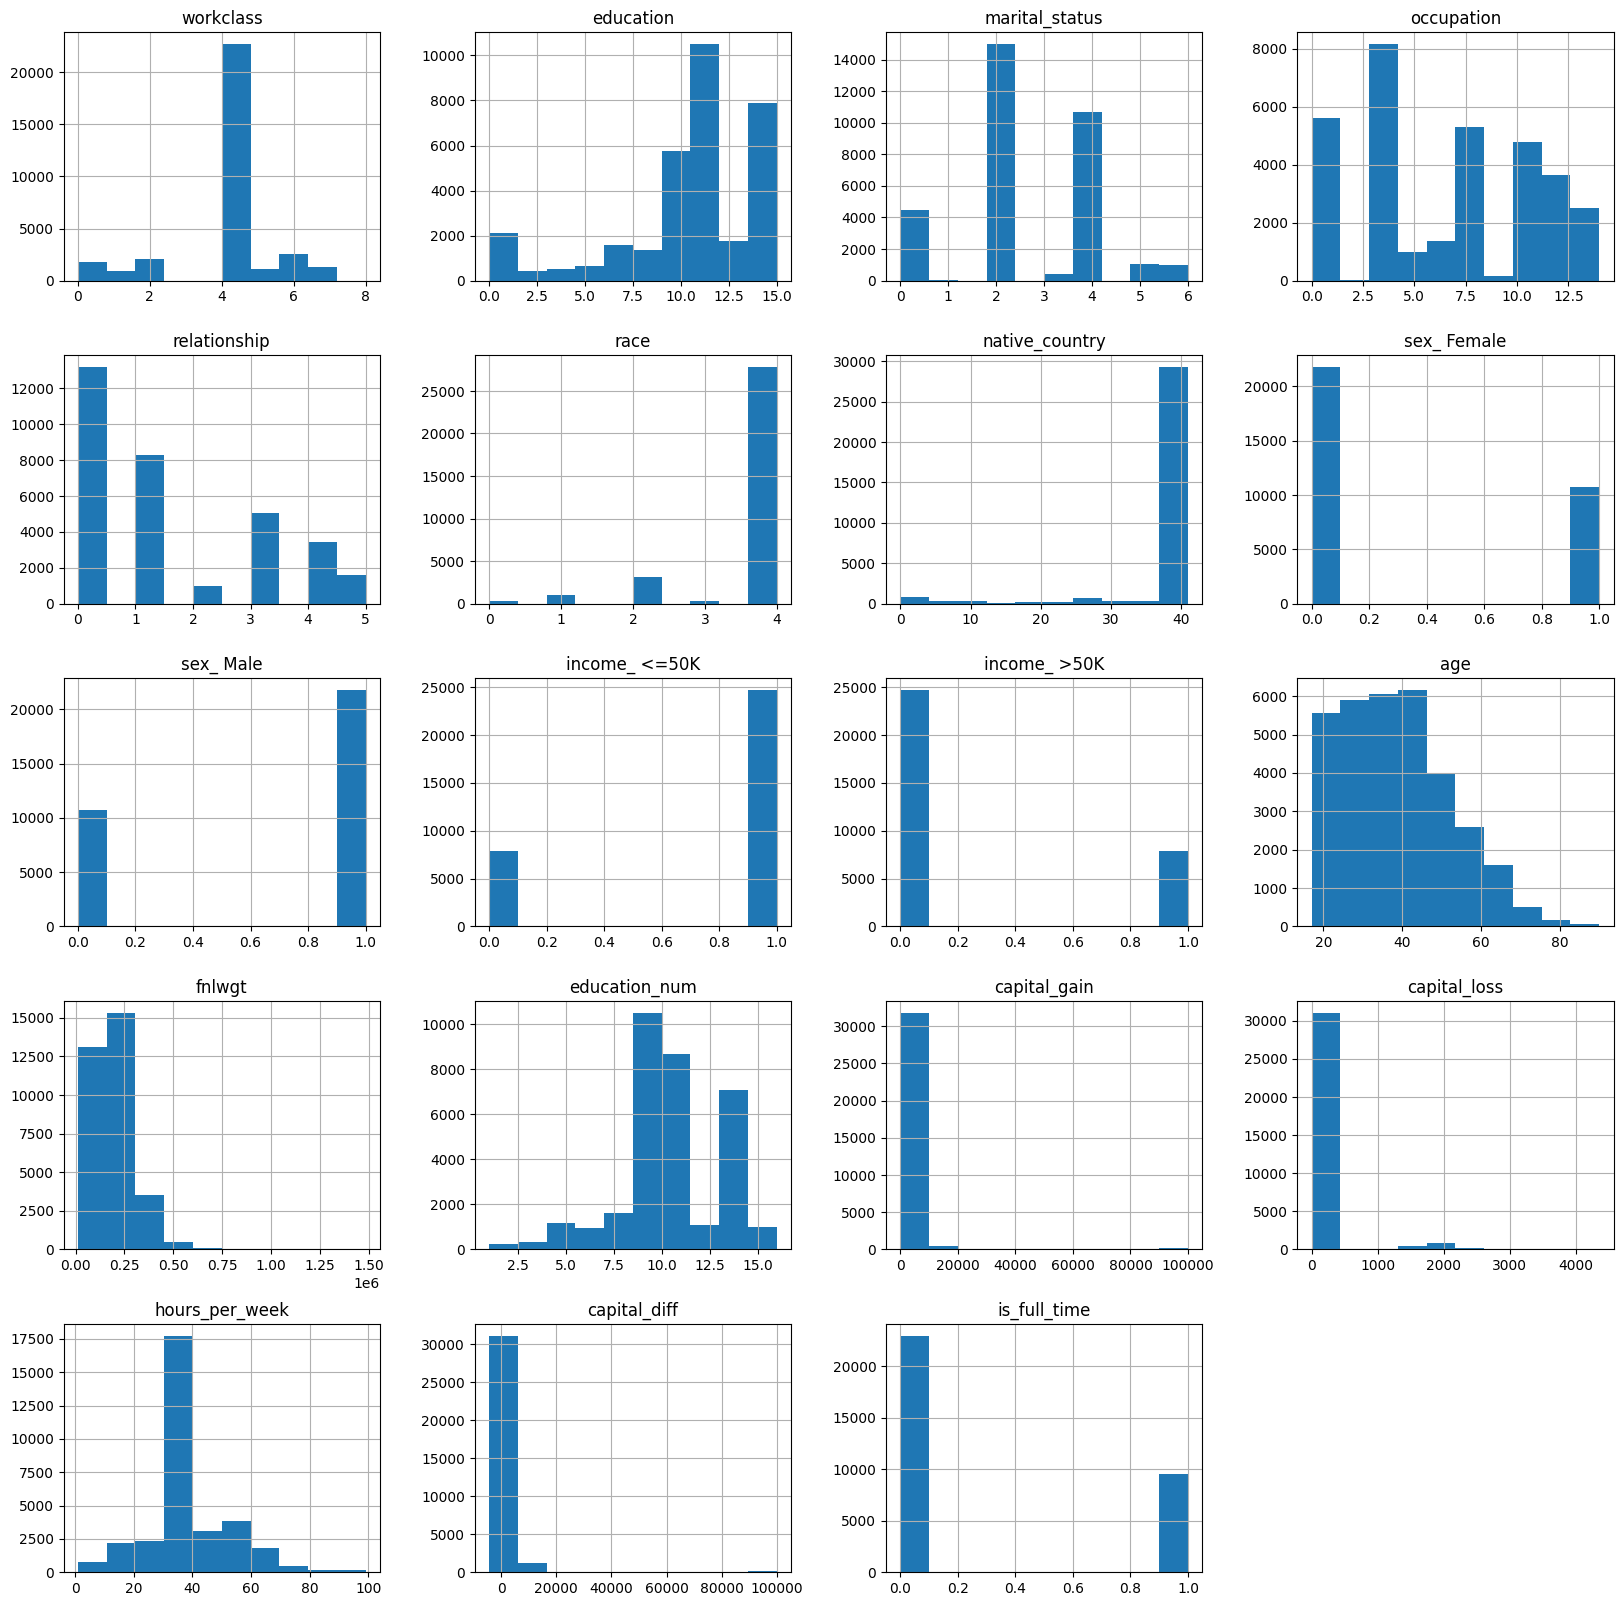

In [19]:
final.hist(figsize=(20,20))

In [20]:
#Fully processed dataset
final.to_csv("final_adult.csv", index=False) # This dataset is now clean, encoded, and ready for training ML models

In [21]:
fdf=pd.read_csv("final_adult.csv")
fdf

,workclass,education,marital_status,occupation,relationship,race,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,capital_diff,is_full_time
0,7,9,4,1,1,4,39,0,1,1,0,39,77516,13,2174,0,40,2174,0
1,6,9,2,4,0,4,39,0,1,1,0,50,83311,13,0,0,13,0,0
2,4,11,0,6,1,4,39,0,1,1,0,38,215646,9,0,0,40,0,0
3,4,1,2,6,0,2,39,0,1,1,0,53,234721,7,0,0,40,0,0
4,4,9,2,10,5,2,5,1,0,1,0,28,338409,13,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,4,7,2,13,5,4,39,1,0,1,0,27,257302,12,0,0,38,0,0
32557,4,11,2,7,0,4,39,0,1,0,1,40,154374,9,0,0,40,0,0
32558,4,11,6,1,4,4,39,1,0,1,0,58,151910,9,0,0,40,0,0
32559,4,11,4,1,3,4,39,0,1,1,0,22,201490,9,0,0,20,0,0
